In [1]:
# External
import mne
mne.set_log_level("CRITICAL")
import numpy as np

import double_dipper
from double_dipper import constants
from double_dipper import dataset
from double_dipper.constants import darkening, tone, problem, strategy_prompt

In [2]:
def divider(metadata):
    return (metadata["epoch"], metadata["condition"], metadata["darkening"])
labeller = lambda metadata: 0

In [3]:
subjNos = [i for i in range(1,11+1) if i != 5]
pairs = double_dipper.io.filePairs(*[f"cleaned/main/{i}" for i in subjNos])
dset = double_dipper.io.partition(lambda meta: (meta["epoch"], meta["condition"], meta["darkening"]),
                                  lambda meta: 0,
                                  pairs)

In [4]:
event_color = { problem.code: "b", darkening.code: "k", strategy_prompt.code: "y", tone.code: "r"}
events = [darkening, problem, tone]
events = np.stack([e.occurrence for e in events])

def quickPlot(data, event_id, start, duration, highpass=1, lowpass=32, order=[1, 2]):
    data = mne.io.RawArray(data, constants.info)
    %matplotlib notebook
    mne.viz.plot_raw(data, events,
                    highpass=highpass, lowpass=lowpass,
                    event_color=event_color,
                    event_id=event_id,
                    start=start,duration=duration,
                    order=order
    );

## Finding a Good Lowpass Frequency

<IPython.core.display.Javascript object>


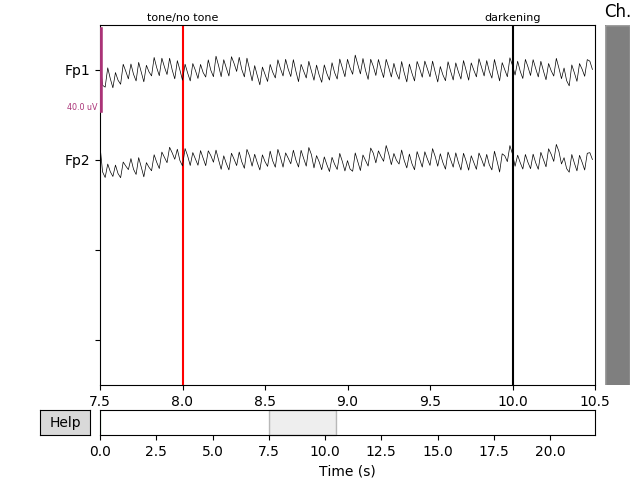

<IPython.core.display.Javascript object>


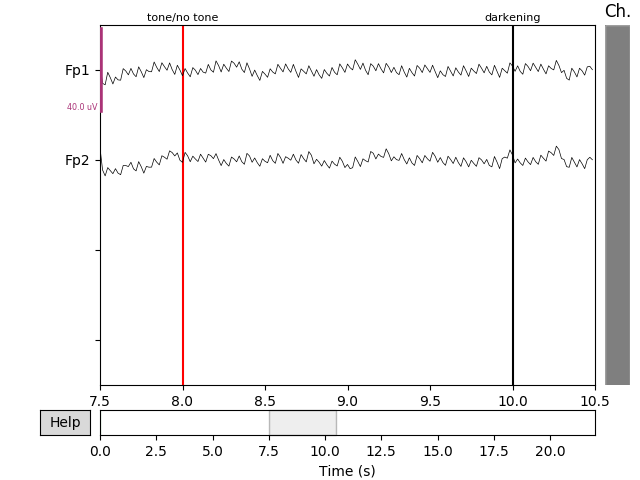

<IPython.core.display.Javascript object>


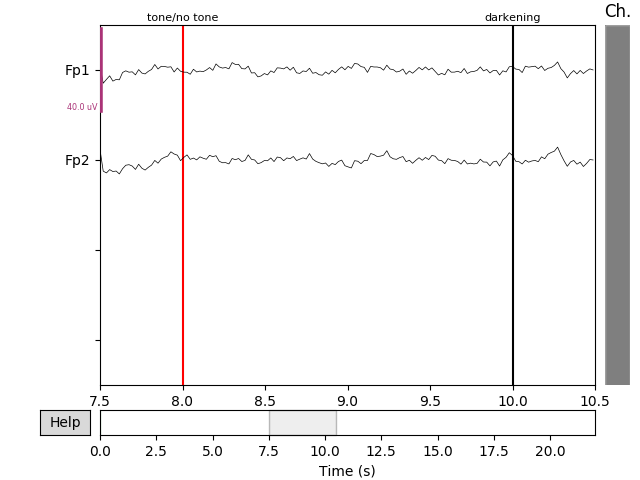

In [5]:
(start, duration) = (tone.delay - 0.5, darkening.delay - tone.delay + 1)
event_id = {"tone/no tone": tone.code, "darkening": darkening.code}
testLowPass = lambda freq: quickPlot(dataset.avg_data(dset), event_id, start, duration, lowpass=freq)
testLowPass(20)
testLowPass(18)
testLowPass(16)

## C1

<IPython.core.display.Javascript object>


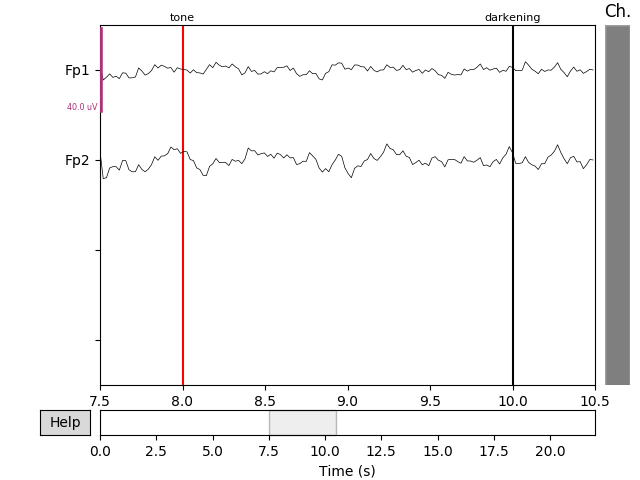

In [6]:
event_id = {"darkening": darkening.code, "tone": tone.code, "problem": problem.code}
subset = dataset.subset(lambda k: k[1] == "C1", dset)
subData = dataset.avg_data(subset)
quickPlot(subData, event_id, start, duration, lowpass=16)

#### Early Epochs

Early subset has 19 distinct times


<IPython.core.display.Javascript object>


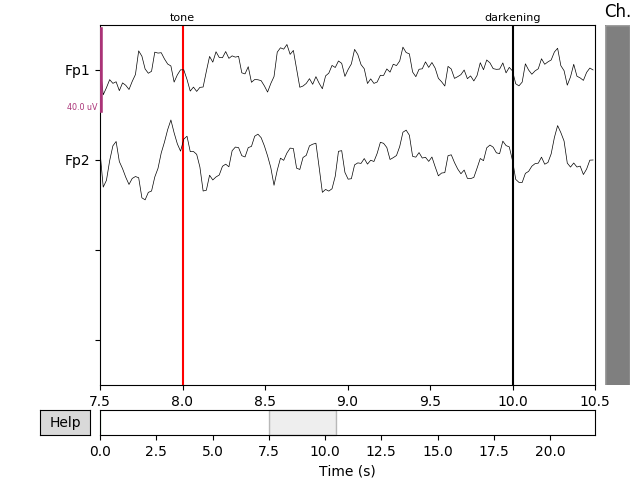

In [7]:
earlySubset = dataset.subset(lambda k: 0 < k[0] and k[0] < 20, subset)
print(f"Early subset has {len(set(k[0] for k in earlySubset.keys()))} distinct times")
earlySubset = dataset.avg_data(earlySubset)
quickPlot(earlySubset, event_id, start, duration, lowpass=16)

## C2

<IPython.core.display.Javascript object>


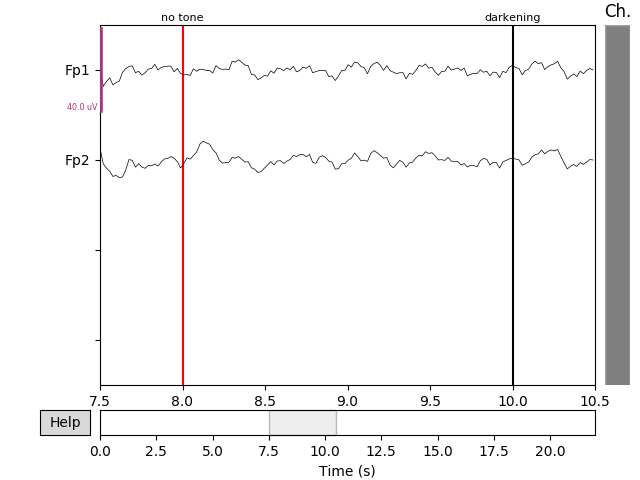

In [8]:
event_id = {"darkening": darkening.code, "no tone": tone.code, "problem": problem.code}
subset = dataset.subset(lambda k: k[1] == "C2", dset)
subData = dataset.avg_data(subset)
quickPlot(subData, event_id, start, duration, lowpass=16)

#### Early Epochs

In [9]:
earlySubset = dataset.subset(lambda k: 0 < k[0] and k[0] < 20, subset)
print(f"Early subset has {len(set(k[0] for k in earlySubset.keys()))} distinct times")
earlyData = dataset.avg_data(earlySubset)

Early subset has 19 distinct times


<IPython.core.display.Javascript object>


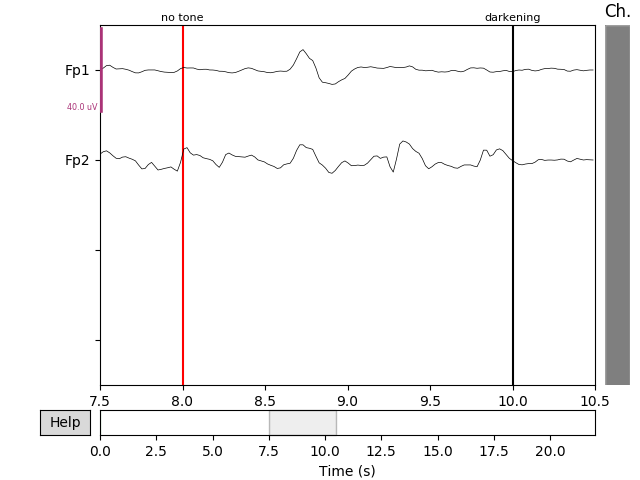

In [10]:
quickPlot(earlyData, event_id, start, duration, lowpass=16)

## Tone - No Tone

In [11]:
C1s = dataset.subset(lambda k: k[1] == "C1", dset)
C2s = dataset.subset(lambda k: k[1] == "C2", dset)

C1data = dataset.avg_data(C1s)
C2data = dataset.avg_data(C2s)
diff = C1data - C2data

In [12]:
event_id = {"darkening/no darkening": darkening.code, "tone/no tone": tone.code, "problem": problem.code}
(start, duration) = (tone.delay - 0.5, darkening.delay - tone.delay + 1)

<IPython.core.display.Javascript object>


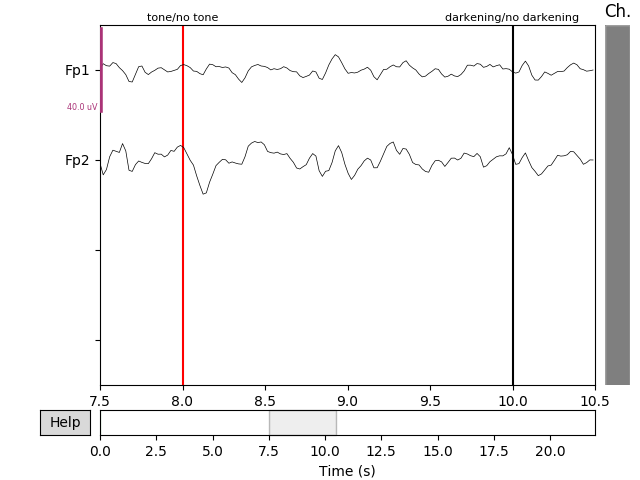

In [13]:
quickPlot(diff, event_id, start, duration, lowpass=16)

#### Early Epochs

<IPython.core.display.Javascript object>


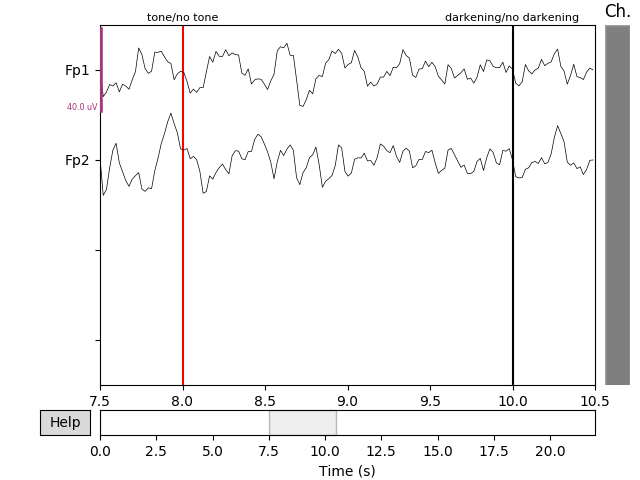

In [14]:
earlySet = dataset.subset(lambda k: 0 < k[0] and k[0] < 20, dset)
C1_early_data = dataset.avg_data(dataset.subset(lambda k: k[1] == "C1", earlySet))
C2_early_data = dataset.avg_data(dataset.subset(lambda k: k[1] == "C2", earlySet))
quickPlot(C1_early_data - C2_early_data, event_id, start, duration, lowpass=16)

## Darkening - No Darkening

In [15]:
event_id = {"darkening/no darkening": darkening.code, "tone/no tone": tone.code, "problem": problem.code}
(start, duration) = (darkening.delay - 0.5, 2)

In [16]:
darkSubset = dataset.subset(lambda k: k[2] == True, dset)
lightSubset = dataset.subset(lambda k: k[2] == False, dset)

darkData = dataset.avg_data(darkSubset)
lightData = dataset.avg_data(lightSubset)
diff = darkData - lightData

<IPython.core.display.Javascript object>


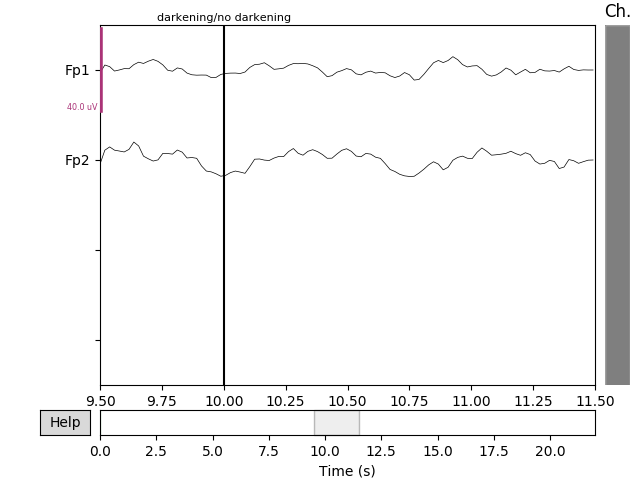

In [17]:
quickPlot(diff, event_id, start, duration, lowpass=16)

#### Earlier Epochs

In [18]:
early = lambda k: (0 < k[0]) and (k[0] < 30)
earlySet = dataset.subset(early, dset)
darkSet = dataset.subset(lambda k: k[2] == True, earlySet)
lightSet = dataset.subset(lambda k: k[2] == False, earlySet)
darkData = dataset.avg_data(darkSet)
lightData = dataset.avg_data(lightSet)

<IPython.core.display.Javascript object>


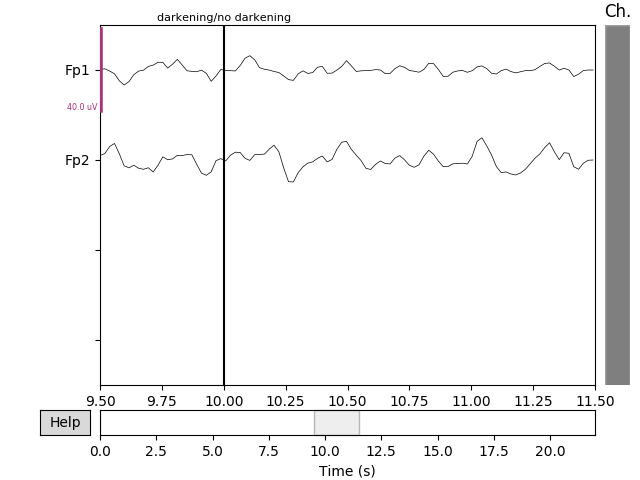

In [19]:
diff = darkData - lightData
quickPlot(diff, event_id, start, 2, lowpass=16)